<div style='background:#e3fcef;padding:16px;border-radius:10px;border:1px solid #b2f5ea;'>
<h1>📧 <span style='color:#2b7a78;'>Case Study: Spam Mail Sınıflandırma</span></h1>
<b>Bu çalışma, e-posta mesajlarının spam olup olmadığını tespit etmek için profesyonel bir makine öğrenmesi süreci sunar.</b><br>
Veri analizi, ön işleme, özellik mühendisliği, modelleme ve değerlendirme adımları sistematik olarak ele alınacaktır.
</div>

<div style='background:#fff3cd;padding:12px;border-radius:8px;border:1px solid #ffeeba;'>
<h2>🔎 <span style='color:#d35400;'>1. Problem Tanımı</span></h2>
<b>Amaç:</b> <span style='color:#2d3436;'>Kullanıcıya gelen e-postaların spam olup olmadığını otomatik olarak tespit eden bir makine öğrenmesi modeli geliştirmek.</span><br>
<b>Veri seti:</b> <code>spam.csv</code> dosyası, iki sütun içerir:<br>
<ul>
<li><b>v1</b>: Etiket (ham/spam)</li>
<li><b>v2</b>: E-posta metni</li>
</ul>
</div>

In [26]:
# 2. Veri Yükleme ve İnceleme
import pandas as pd
import numpy as np

DATA_PATH = r'C:\Users\Cemal\OneDrive\Desktop\2025\Eğitimler\Kairu\Doğal Dil İşleme - NLP Bootcamp Kairu\kairu-nlpbootcamp\hafta_3\spam.csv'

df = pd.read_csv(DATA_PATH, encoding='ISO-8859-1', usecols=[0,1])
df.columns = ['label', 'text']

In [27]:
print('Veri seti boyutu:', df.shape)
print('Etiket dağılımı:')
print(df['label'].value_counts())
df.head()

Veri seti boyutu: (5572, 2)
Etiket dağılımı:
label
ham     4825
spam     747
Name: count, dtype: int64


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<div style='background:#f0f3f4;padding:16px;border-radius:10px;border:1px solid #d5dbdb;'>
<h2>📊 <span style='color:#154360;'>Keşifsel Veri Analizi (EDA)</span></h2>
<b>Veri setinin yapısını ve temel istatistiklerini anlamak için EDA adımları uygulanır.</b>
</div>

In [28]:
# Gerekli kütüphaneleri yükle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Veri setinin ilk 5 satırını göster
print('Veri setinin ilk 5 satırı:')
display(df.head())

# Veri setinin son 5 satırını göster
print('Veri setinin son 5 satırı:')
display(df.tail())

Veri setinin ilk 5 satırı:


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Veri setinin son 5 satırı:


,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


<div style='background:#d6eaf8;padding:12px;border-radius:8px;border:1px solid #5dade2;'>
<b>Etiket Dağılımı</b>: Veri setinde kaç adet ham ve spam mesaj var?
</div>

C:\Users\Cemal\AppData\Local\Temp\ipykernel_22588\2339820633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#58d68d','#e74c3c'])


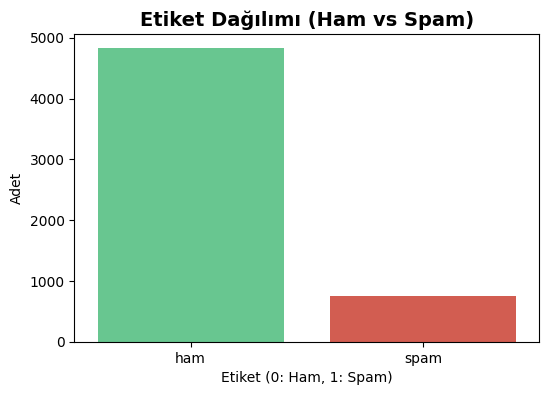

Etiket oranları:
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


In [29]:
# Etiket dağılımını görselleştir
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette=['#58d68d','#e74c3c'])
plt.title('Etiket Dağılımı (Ham vs Spam)', fontsize=14, fontweight='bold')
plt.xlabel('Etiket (0: Ham, 1: Spam)')
plt.ylabel('Adet')
plt.show()

# Etiket oranlarını yazdır
print('Etiket oranları:')
print(df['label'].value_counts(normalize=True))

<div style='background:#f9ebea;padding:12px;border-radius:8px;border:1px solid #e74c3c;'>
<b>Mesaj Uzunlukları</b>: Mesajların karakter ve kelime sayısı dağılımı incelenir.
</div>

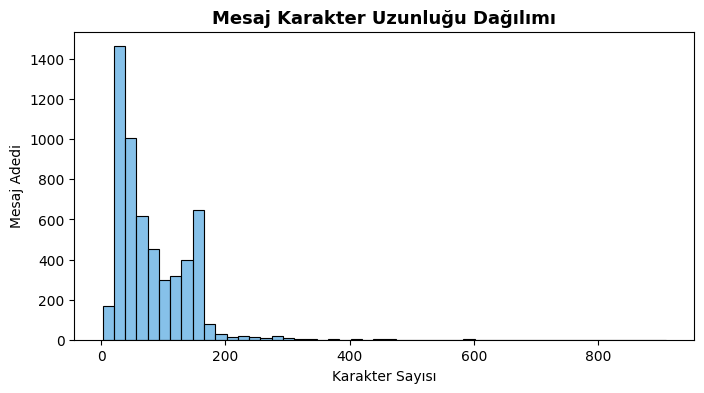

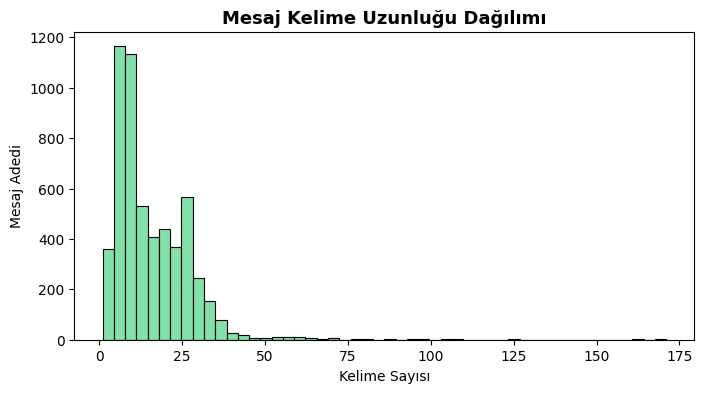

In [30]:
# Mesaj uzunluklarını hesapla
df['char_length'] = df['text'].apply(len)
df['word_length'] = df['text'].apply(lambda x: len(x.split()))

# Karakter uzunluğu dağılımı
plt.figure(figsize=(8,4))
sns.histplot(df['char_length'], bins=50, color='#5dade2')
plt.title('Mesaj Karakter Uzunluğu Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Karakter Sayısı')
plt.ylabel('Mesaj Adedi')
plt.show()

# Kelime uzunluğu dağılımı
plt.figure(figsize=(8,4))
sns.histplot(df['word_length'], bins=50, color='#58d68d')
plt.title('Mesaj Kelime Uzunluğu Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Mesaj Adedi')
plt.show()

In [32]:
df = df.dropna(subset=['text'])


<div style='background:#fff3cd;padding:12px;border-radius:8px;border:1px solid #ffeeba;'>
<b>Örnek Mesajlar</b>: Ham ve spam mesajlardan örnekler.
</div>

In [34]:
# Ham ve spam mesajlardan rastgele örnekler gösterilir.
def print_random_examples(df, label_value, label_name, emoji, n=3):
    subset = df[df['label'] == label_value]['text']
    count = min(n, len(subset))
    print(f"{emoji} {label_name} mesaj örnekleri:")
    if count == 0:
        print(f"Uyarı: Veri setinde hiç {label_name.lower()} mesaj yok!")
    else:
        for i, msg in enumerate(subset.sample(count, random_state=1), 1):
            print(f"{label_name} {i}: {msg}")

print_random_examples(df, 0, "Ham", "📩")
print()
print_random_examples(df, 1, "Spam", "🚨")

📩 Ham mesaj örnekleri:
Ham 1: Can you pls pls send me a mail on all you know about relatives coming to deliver here? All you know about costs, risks, benefits and anything else. Thanks.
Ham 2: Yeah, probably but not sure. Ilol let u know, but personally I wuldnt bother, then again if ur goin to then I mite as well!!
Ham 3: Were gonna go get some tacos

🚨 Spam mesaj örnekleri:
Spam 1: Marvel Mobile Play the official Ultimate Spider-man game (å£4.50) on ur mobile right now. Text SPIDER to 83338 for the game & we ll send u a FREE 8Ball wallpaper
Spam 2: Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832
Spam 3: Free msg. Sorry, a service you ordered from 81303 could not be delivered as you do not have sufficient credit. Please top up to receive the service.


<div style='background:#dff9fb;padding:12px;border-radius:8px;border:1px solid #c7ecee;'>
<b>Word Cloud</b>: En sık geçen kelimeleri görselleştir.
</div>

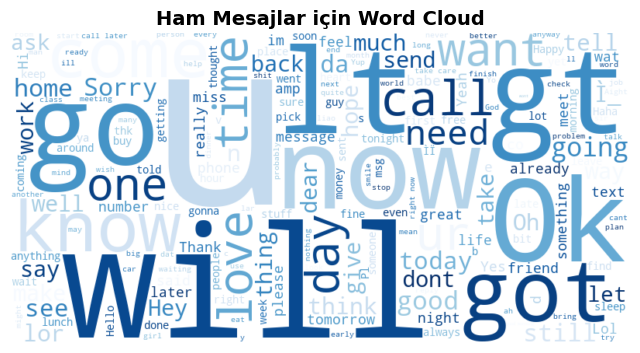

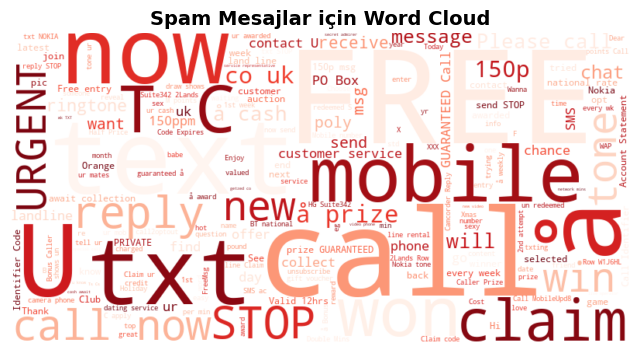

In [35]:
# Ham mesajlar için word cloud
ham_words = ' '.join(df[df['label']==0]['text'])
plt.figure(figsize=(8,6))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Mesajlar için Word Cloud', fontsize=14, fontweight='bold')
plt.show()

# Spam mesajlar için word cloud
spam_words = ' '.join(df[df['label']==1]['text'])
plt.figure(figsize=(8,6))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Mesajlar için Word Cloud', fontsize=14, fontweight='bold')
plt.show()

<div style='background:#dff9fb;padding:12px;border-radius:8px;border:1px solid #c7ecee;'>
<h2>🧹 <span style='color:#0097e6;'>4. Veri Ön İşleme</span></h2>
<b>Metin verisi üzerinde profesyonel ön işleme adımları uygulanacaktır:</b>
<ul>
<li><span style='color:#30336b;'>Küçük harfe çevirme</span></li>
<li><span style='color:#30336b;'>Noktalama ve rakamları kaldırma</span></li>
<li><span style='color:#30336b;'>Stopword'leri temizleme</span></li>
<li><span style='color:#30336b;'>Tokenizasyon</span></li>
<li><span style='color:#30336b;'>Gereksiz boşlukları kaldırma</span></li>
</ul>
</div>

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Noktalama ve rakamları kaldır
    text = pd.Series(text).str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\d+', '', regex=True).values[0]
    # Tokenizasyon
    tokens = word_tokenize(text)
    # Stopword temizliği
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Boşlukları kaldır
    tokens = [word.strip() for word in tokens if word.strip() != '']
    return tokens

df['normalized_text'] = df['text'].apply(preprocess_text)
df[['text', 'normalized_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,normalized_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


<div style='background:#f6e58d;padding:12px;border-radius:8px;border:1px solid #f9ca24;'>
<h2>🏷️ <span style='color:#e17055;'>5. Etiket Dönüşümü</span></h2>
<b>Etiketler sayısal hale getirilir:</b> <span style='color:#636e72;'>ham=0, spam=1</span>
</div>

In [33]:
label_mapping = {'ham': 0, 'spam': 1}
df['label'] = df['label'].map(label_mapping)
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

<div style='background:#dff9fb;padding:12px;border-radius:8px;border:1px solid #c7ecee;'>
<h2>🛠️ <span style='color:#0097e6;'>6. Özellik Mühendisliği ve Vektörleştirme</span></h2>
<b>TF-IDF vektörleştirme ile metinler sayısal hale getirilir.</b>
</div>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
X = df['normalized_text']
y = df['label']

X_tfidf = vectorizer.fit_transform(X)
print('TF-IDF matris boyutu:', X_tfidf.shape)

TF-IDF matris boyutu: (5572, 8484)


c:\Users\Cemal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<div style='background:#f3e9ff;padding:12px;border-radius:8px;border:1px solid #a29bfe;'>
<h2>🤖 <span style='color:#6c3483;'>7. Modelleme</span></h2>
<b>Veri eğitim ve test olarak ayrılır. Lojistik Regresyon modeli ile sınıflandırma yapılır.</b>
</div>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

y_pred_dict = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_dict[name] = model.predict(X_test)

<div style='background:#eafaf1;padding:12px;border-radius:8px;border:1px solid #58d68d;'>
<h2>📊 <span style='color:#229954;'>8. Model Değerlendirme</span></h2>
<b>Başarı metrikleri ve hata matrisi ile model performansı analiz edilir.</b>
</div>


Logistic Regression - Doğruluk Skoru: 0.9587
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Naive Bayes - Doğruluk Skoru: 0.9650
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115


Linear SVC - Doğruluk Skoru: 0.9812
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macr

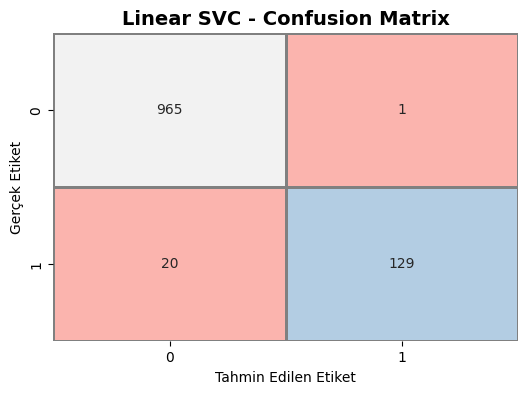

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

best_score = 0
best_model = None
best_pred = None

for name, y_pred in y_pred_dict.items():
    score = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Doğruluk Skoru: {score:.4f}")
    print(classification_report(y_test, y_pred))
    if score > best_score:
        best_score = score
        best_model = name
        best_pred = y_pred

print(f"\nEn iyi model: {best_model} (Doğruluk: {best_score:.4f})")

# En iyi modelin confusion matrixini pastel tonlarla çiz
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', cbar=False, linewidths=2, linecolor='gray')
plt.title(f'{best_model} - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

<div style='background:#f9ebea;padding:12px;border-radius:8px;border:1px solid #e74c3c;'>
<h2>🚀 <span style='color:#c0392b;'>9. Gerçek Zamanlı Tahmin</span></h2>
<b>Modeli yeni bir e-posta üzerinde test edelim.</b>
</div>

In [42]:
def predict_mail(text):
    tokens = preprocess_text(text)
    tfidf = vectorizer.transform([tokens])
    pred = model.predict(tfidf)[0]
    return 'Spam' if pred == 1 else 'Ham'

test_text = "There is a free prize if you share your account informations with us."
print('Tahmin:', predict_mail(test_text))

Tahmin: Ham
